<a href="https://colab.research.google.com/github/BMugo84/pytorch_in_25_hours/blob/main/09_pytorch_model_deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro



Welcome to Milestone Project 3: PyTorch Model Deployment!

We've come a long way with our FoodVision Mini project.

But so far our PyTorch models have only been accessible to us.

How about we bring FoodVision Mini to life and make it publically accessible?

In other words, **we're going to deploy our FoodVision Mini model to the internet as a usable app!**

<img src="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/09-model-deployment-what-were-doing-demo-trimmed-cropped-small.gif" alt="demo of foodvision mini computer vision model being used on a mobile device to predict on an image of sushi and getting it right" width=900/>

*Trying out the [deployed version of FoodVision Mini](https://huggingface.co/spaces/mrdbourke/foodvision_mini) (what we're going to build) on my lunch. The model got it right too 🍣!*

## What is machine learning model deployment?

**Machine learning model deployment** is the process of making your machine learning model accessible to someone or something else.

Someone else being a person who can interact with your model in some way.

For example, someone taking a photo on their smartphone of food and then having our FoodVision Mini model classify it into pizza, steak or sushi.

Something else might be another program, app or even another model that interacts with your machine learning model(s).

For example, a banking database might rely on a machine learning model making predictions as to whether a transaction is fraudulent or not before transferring funds.

Or an operating system may lower its resource consumption based on a machine learning model making predictions on how much power someone generally uses at specific times of day.

These use cases can be mixed and matched as well.

For example, a Tesla car's computer vision system will interact with the car's route planning program (something else) and then the route planning program will get inputs and feedback from the driver (someone else).

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-what-is-model-deployment-someone-or-something-else.png" width=900 alt="two use cases for model deployment, making your model available to someone else, for example, someone using it in an app, or making it available to something else such as another program or model"/>

*Machine learning model deployment involves making your model available to someone or something else. For example, someone might use your model as part of a food recognition app (such as FoodVision Mini or [Nutrify](https://nutrify.app)). And something else might be another model or program using your model such as a banking system using a machine learning model to detect if a transaction is fraud or not.*
          
          
          

## Why deploy a machine learning model?

One of the most important philosophical questions in machine learning is:

<div align="center">
<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-does-it-exist.jpeg" alt="curious dinosaur often referred to as philosoraptor asking the question if a machine learning model never leaves a notebook, does it exist?" width=300/>
</div>

Deploying a model is as important as training one.

Because although you can get a pretty good idea of how your model's going to function by evaluting it on a well crafted test set or visualizing its results, you never really know how it's going to perform until you release it to the wild.

Having people who've never used your model interact with it will often reveal edge cases you never thought of during training.

For example, what happens if someone was to upload a photo that *wasn't* of food to our FoodVision Mini model?

One solution would be to create another model that first classifies images as "food" or "not food" and passing the target image through that model first (this is what [Nutrify](https://nutrify.app) does).

Then if the image is of "food" it goes to our FoodVision Mini model and gets classified into pizza, steak or sushi.

And if it's "not food", a message is displayed.

But what if these predictions were wrong?

What happens then?

You can see how these questions could keep going.

Thus this highlights the importance of model deployment: it helps you figure out errors in your model that aren't obvious during training/testing.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-pytorch-workflow-with-deployment.png" alt="A PyTorch workflow with added model deployment and monitoring step" width=900/>

*We covered a PyTorch workflow back in [01. PyTorch Workflow](https://www.learnpytorch.io/01_pytorch_workflow/). But once you've got a good model, deployment is a good next step. Monitoring involves seeing how your model goes on the most important data split: data from the real world. For more resources on deployment and monitoring see [PyTorch Extra Resources](https://www.learnpytorch.io/pytorch_extra_resources/#resources-for-machine-learning-and-deep-learning-engineering).*

## Different types of machine learning model deployment

Whole books could be written on the different types of machine learning model deployment (and many good ones are listed in [PyTorch Extra Resources](https://www.learnpytorch.io/pytorch_extra_resources/#resources-for-machine-learning-and-deep-learning-engineering)).

And the field is still developing in terms of best practices.

But I like to start with the question:

> "What is the most ideal scenario for my machine learning model to be used?"

And then work backwards from there.

Of course, you may not know this ahead of time. But you're smart enough to imagine such things.

In the case of FoodVision Mini, our ideal scenario might be:

* Someone takes a photo on a mobile device (through an app or web broswer).
* The prediction comes back fast.

Easy.

So we've got two main criteria:

1. The model should work on a mobile device (this means there will be some compute constraints).
2. The model should make predictions *fast* (because a slow app is a boring app).

And of course, depending on your use case, your requirements may vary.

You may notice the above two points break down into another two questions:

1. **Where's it going to go?** - As in, where is it going to be stored?
2. **How's it going to function?** - As in, does it return predictions immediately? Or do they come later?

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-deployment-questions-to-ask.png" alt="some questions to ask when starting to deploy machine learning models, what's the model ideal use case, then work backwards and ask where's my model going to go and how's my model going to function" width=900/>

*When starting to deploy machine learning models, it's helpful to start by asking what's the most ideal use case and then work backwards from there, asking where the model's going to go and then how it's going to function.*

### Where's it going to go?

When you deploy your machine learning model, where does it live?

The main debate here is usually on-device (also called edge/in the browser) or on the cloud (a computer/server that isn't the *actual* device someone/something calls the model from).

Both have their pros and cons.

| **Deployment location** | **Pros** | **Cons** |
| ----- | ----- | ----- |
| **On-device (edge/in the browser)** | Can be very fast (since no data leaves the device) | Limited compute power (larger models take longer to run) |
| | Privacy preserving (again no data has to leave the device) | Limited storage space (smaller model size required) |
| | No internet connection required (sometimes) | Device-specific skills often required |
| | | |
| **On cloud** | Near unlimited compute power (can scale up when needed) | Costs can get out of hand (if proper scaling limits aren't enforced) |
| | Can deploy one model and use everywhere (via API) | Predictions can be slower due to data having to leave device and predictions having to come back (network latency) |
| | Links into existing cloud ecosystem | Data has to leave device (this may cause privacy concerns) |

There are more details to these but I've left resources in the [extra-curriculum](https://www.learnpytorch.io/09_pytorch_model_deployment/#extra-curriculum) to learn more.

Let's give an example.

If we're deploying FoodVision Mini as an app, we want it to perform well and fast.

So which model would we prefer?

1. A model on-device that performs at 95% accuracy with an inference time (latency) of one second per prediction.
2. A model on the cloud that performs at 98% accuracy with an inference time of 10 seconds per per prediction (bigger, better model but takes longer to compute).

I've made these numbers up but they showcase a potential difference between on-device and on the cloud.

Option 1 could potentially be a smaller less performant model that runs fast because its able to fit on a mobile device.

Option 2 could potentially a larger more performant model that requires more compute and storage but it takes a bit longer to run because we have to send data off the device and get it back (so even though the actual prediction might be fast, the network time and data transfer has to factored in).

For FoodVision Mini, we'd likely prefer option 1, because the small hit in performance is far outweighed by the faster inference speed.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-model-deployment-on-device-vs-cloud.png" width=900 alt="tesla computer vision system on device vs on the cloud"/>

*In the case of a Tesla car's computer vision system, which would be better? A smaller model that performs well on device (model is on the car) or a larger model that performs better that's on the cloud? In this case, you'd much prefer the model being on the car. The extra network time it would take for data to go from the car to the cloud and then back to the car just wouldn't be worth it (or potentially even impossible with poor signal areas).*

> **Note:** For a full example of seeing what it's like to deploy a PyTorch model to an edge device, see the [PyTorch tutorial on achieving real-time inference (30fps+)](https://pytorch.org/tutorials/intermediate/realtime_rpi.html) with a computer vision model on a Raspberry Pi.

### How's it going to function?

Back to the ideal use case, when you deploy your machine learning model, how should it work?

As in, would you like predictions returned immediately?

Or is it okay for them to happen later?

These two scenarios are generally referred to as:

* **Online (real-time)** - Predicitions/inference happen **immediately**. For example, someone uploads an image, the image gets transformed and predictions are returned or someone makes a purchase and the transaction is verified to be non-fradulent by a model so the purchase can go through.
* **Offline (batch)** - Predictions/inference happen **periodically**. For example, a photos application sorts your images into different categories (such as beach, mealtime, family, friends) whilst your mobile device is plugged into charge.

> **Note:** "Batch" refers to inference being performed on multiple samples at a time. However, to add a little confusion, batch processing can happen immediately/online (multiple images being classified at once) and/or offline (mutliple images being predicted/trained on at once).  

The main difference between each being: predictions being made immediately or periodically.

Periodically can have a varying timescale too, from every few seconds to every few hours or days.

And you can mix and match the two.

In the case of FoodVision Mini, we'd want our inference pipeline to happen online (real-time), so when someone uploads an image of pizza, steak or sushi, the prediction results are returned immediately (any slower than real-time would make a boring experience).

But for our training pipeline, it's okay for it to happen in a batch (offline) fashion, which is what we've been doing throughout the previous chapters.

### Ways to deploy a machine learning model

We've discussed a couple of options for deploying machine learning models (on-device and cloud).

And each of these will have their specific requirements:

| **Tool/resource** | **Deployment type** |
| ----- | ----- |
| [Google's ML Kit](https://developers.google.com/ml-kit) | On-device (Android and iOS) |
| [Apple's Core ML](https://developer.apple.com/documentation/coreml) and [`coremltools` Python package](https://coremltools.readme.io/docs) | On-device (all Apple devices) |
| [Amazon Web Service's (AWS) Sagemaker](https://aws.amazon.com/sagemaker/) | Cloud |
| [Google Cloud's Vertex AI](https://cloud.google.com/vertex-ai) | Cloud |
| [Microsoft's Azure Machine Learning](https://azure.microsoft.com/en-au/services/machine-learning/) | Cloud |
| [Hugging Face Spaces](https://huggingface.co/spaces) | Cloud |
| API with [FastAPI](https://fastapi.tiangolo.com) | Cloud/self-hosted server |
| API with [TorchServe](https://pytorch.org/serve/) | Cloud/self-hosted server |
| [ONNX (Open Neural Network Exchange)](https://onnx.ai/index.html) | Many/general |
| Many more... ||

> **Note:** An [application programming interface (API)](https://en.wikipedia.org/wiki/API) is a way for two (or more) computer programs to interact with each other. For example, if your model was deployed as API, you would be able to write a program that could send data to it and then receive predictions back.

Which option you choose will be highly dependent on what you're building/who you're working with.

But with so many options, it can be very intimidating.

So best to start small and keep it simple.

And one of the best ways to do so is by turning your machine learning model into a demo app with [Gradio](https://gradio.app) and then deploying it on Hugging Face Spaces.

We'll be doing just that with FoodVision Mini later on.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-tools-and-places-to-deploy-ml-models.png" alt="tools and places to deploy machine learning models" width=900/>

*A handful of places and tools to host and deploy machine learning models. There are plenty I've missed so if you'd like to add more, please leave a [discussion on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/discussions).*

## What we're going to cover

Enough talking about deploying a machine learning model.

Let's become machine learning engineers and actually deploy one.

Our goal is to deploy our FoodVision Model via a demo Gradio app with the following metrics:
1. **Performance:** 95%+ accuracy.
2. **Speed:** real-time inference of 30FPS+ (each prediction has a latency of lower than ~0.03s).

We'll start by running an experiment to compare our best two models so far: EffNetB2 and ViT feature extractors.

Then we'll deploy the one which performs closest to our goal metrics.

Finally, we'll finish with a (BIG) surprise bonus.

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Getting setup** | We've written a fair bit of useful code over the past few sections, let's download it and make sure we can use it again. |
| **1. Get data** | Let's download the [`pizza_steak_sushi_20_percent.zip`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip) dataset so we can train our previously best performing models on the same dataset. |
| **2. FoodVision Mini model deployment experiment outline** | Even on the third milestone project, we're still going to be running multiple experiments to see which model (EffNetB2 or ViT) achieves closest to our goal metrics. |
| **3. Creating an EffNetB2 feature extractor** | An EfficientNetB2 feature extractor performed the best on our pizza, steak, sushi dataset in [07. PyTorch Experiment Tracking](https://www.learnpytorch.io/07_pytorch_experiment_tracking/), let's recreate it as a candidate for deployment. |
| **4. Creating a ViT feature extractor** | A ViT feature extractor has been the best performing model yet on our pizza, steak, sushi dataset in [08. PyTorch Paper Replicating](https://www.learnpytorch.io/08_pytorch_paper_replicating/), let's recreate it as a candidate for deployment alongside EffNetB2. |
| **5. Making predictions with our trained models and timing them** | We've built two of the best performing models yet, let's make predictions with them and track their results. |
| **6. Comparing model results, prediction times and size** | Let's compare our models to see which performs best with our goals. |
| **7. Bringing FoodVision Mini to life by creating a Gradio demo** | One of our models performs better than the other (in terms of our goals), so let's turn it into a working app demo! |
| **8. Turning our FoodVision Mini Gradio demo into a deployable app** | Our Gradio app demo works locally, let's prepare it for deployment! |
| **9. Deploying our Gradio demo to HuggingFace Spaces** | Let's take FoodVision Mini to the web and make it pubically accessible for all! |
| **10. Creating a BIG surprise** | We've built FoodVision Mini, time to step things up a notch. |
| **11. Deploying our BIG surprise** | Deploying one app was fun, how about we make it two? |

## Where can you get help?

All of the materials for this course [are available on GitHub](https://github.com/mrdbourke/pytorch-deep-learning).

If you run into trouble, you can ask a question on the course [GitHub Discussions page](https://github.com/mrdbourke/pytorch-deep-learning/discussions).

And of course, there's the [PyTorch documentation](https://pytorch.org/docs/stable/index.html) and [PyTorch developer forums](https://discuss.pytorch.org/), a very helpful place for all things PyTorch.

# 0. Getting setup

In [1]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
# try:
#     import torch
#     import torchvision
#     assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
#     assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
#     print(f"torch version: {torch.__version__}")
#     print(f"torchvision version: {torchvision.__version__}")
# except:
#     print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
#     !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
#     import torch
#     import torchvision
#     print(f"torch version: {torch.__version__}")
#     print(f"torchvision version: {torchvision.__version__}")

In [2]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

[INFO] Couldn't find torchinfo... installing it.
[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4177, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 4177 (delta 61), reused 104 (delta 38), pack-reused 4035 (from 1)
Receiving objects: 100% (4177/4177), 651.42 MiB | 30.57 MiB/s, done.
Resolving deltas: 100% (2432/2432), done.
Updating files: 100% (248/248), done.


Finally, we'll setup device-agnostic code to make sure our models run on the GPU.

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# 1. Getting data

In [4]:
# Download pizza, steak, sushi images from GitHub
data_20_percent_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip",
                                     destination="pizza_steak_sushi_20_percent")

data_20_percent_path

[INFO] Did not find data/pizza_steak_sushi_20_percent directory, creating one...
[INFO] Downloading pizza_steak_sushi_20_percent.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip...
[INFO] Unzipping pizza_steak_sushi_20_percent.zip data...


PosixPath('data/pizza_steak_sushi_20_percent')

Wonderful!

Now we've got a dataset, let's create training and test paths.

In [5]:
# Setup directory paths to train and test images
train_dir = data_20_percent_path / "train"
test_dir = data_20_percent_path / "test"

# 2. FoodVision Mini model deployment experiment outline

# 3. Creating an EffNetB2 feature extractor

In [6]:
# 1. Setup pretrained EffNetB2 weights
effnetb2_weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT

# 2. Get EffNetB2 transforms
effnetb2_transforms = effnetb2_weights.transforms()

# 3. Setup pretrained model
effnetb2 = torchvision.models.efficientnet_b2(weights=effnetb2_weights) # could also use weights="DEFAULT"

# 4. Freeze the base layers in the model (this will freeze all layers to begin with)
for param in effnetb2.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-c35c1473.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b2_rwightman-c35c1473.pth
100%|██████████| 35.2M/35.2M [00:00<00:00, 103MB/s]


In [7]:
# Check out EffNetB2 classifier head
effnetb2.classifier

Sequential(
  (0): Dropout(p=0.3, inplace=True)
  (1): Linear(in_features=1408, out_features=1000, bias=True)
)

In [8]:
# 5. Update the classifier head
effnetb2.classifier = nn.Sequential(
    nn.Dropout(p=0.3, inplace=True), # keep dropout layer same
    nn.Linear(in_features=1408, # keep in_features same
              out_features=3)) # change out_features to suit our number of classes

## 3.1 Creating a function to make an EffNetB2 feature extractor#

In [9]:
def create_effnetb2_model(num_classes:int=3,
                          seed:int=42):
    """Creates an EfficientNetB2 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of classes in the classifier head.
            Defaults to 3.
        seed (int, optional): random seed value. Defaults to 42.

    Returns:
        model (torch.nn.Module): EffNetB2 feature extractor model.
        transforms (torchvision.transforms): EffNetB2 image transforms.
    """
    # 1, 2, 3. Create EffNetB2 pretrained weights, transforms and model
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.efficientnet_b2(weights=weights)

    # 4. Freeze all layers in base model
    for param in model.parameters():
        param.requires_grad = False

    # 5. Change classifier head with random seed for reproducibility
    torch.manual_seed(seed)
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes),
    )

    return model, transforms

In [10]:
effnetb2, effnetb2_transforms = create_effnetb2_model(num_classes=3,
                                                      seed=42)

## 3.2 Creating DataLoaders for EffNetB2

In [11]:
# Setup DataLoaders
from going_modular.going_modular import data_setup
train_dataloader_effnetb2, test_dataloader_effnetb2, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                 test_dir=test_dir,
                                                                                                 transform=effnetb2_transforms,
                                                                                                 batch_size=32)

## 3.3 Training EffNetB2 feature extractor

In [12]:
from going_modular.going_modular import engine

# Setup optimizer
optimizer = torch.optim.Adam(params=effnetb2.parameters(),
                             lr=1e-3)
# Setup loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Set seeds for reproducibility and train the model
set_seeds()
effnetb2_results = engine.train(model=effnetb2,
                                train_dataloader=train_dataloader_effnetb2,
                                test_dataloader=test_dataloader_effnetb2,
                                epochs=10,
                                optimizer=optimizer,
                                loss_fn=loss_fn,
                                device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9839 | train_acc: 0.5667 | test_loss: 0.7393 | test_acc: 0.9409
Epoch: 2 | train_loss: 0.7135 | train_acc: 0.8396 | test_loss: 0.5862 | test_acc: 0.9409
Epoch: 3 | train_loss: 0.5874 | train_acc: 0.8958 | test_loss: 0.4891 | test_acc: 0.9563
Epoch: 4 | train_loss: 0.4488 | train_acc: 0.9146 | test_loss: 0.4338 | test_acc: 0.9409
Epoch: 5 | train_loss: 0.4277 | train_acc: 0.9125 | test_loss: 0.3907 | test_acc: 0.9443
Epoch: 6 | train_loss: 0.4392 | train_acc: 0.8896 | test_loss: 0.3525 | test_acc: 0.9688
Epoch: 7 | train_loss: 0.4246 | train_acc: 0.8771 | test_loss: 0.3263 | test_acc: 0.9563
Epoch: 8 | train_loss: 0.3885 | train_acc: 0.8979 | test_loss: 0.3465 | test_acc: 0.9443
Epoch: 9 | train_loss: 0.3795 | train_acc: 0.8812 | test_loss: 0.3127 | test_acc: 0.9193
Epoch: 10 | train_loss: 0.3752 | train_acc: 0.8688 | test_loss: 0.2811 | test_acc: 0.9625


## 3.4 Inspect EffNetB2 loss curves

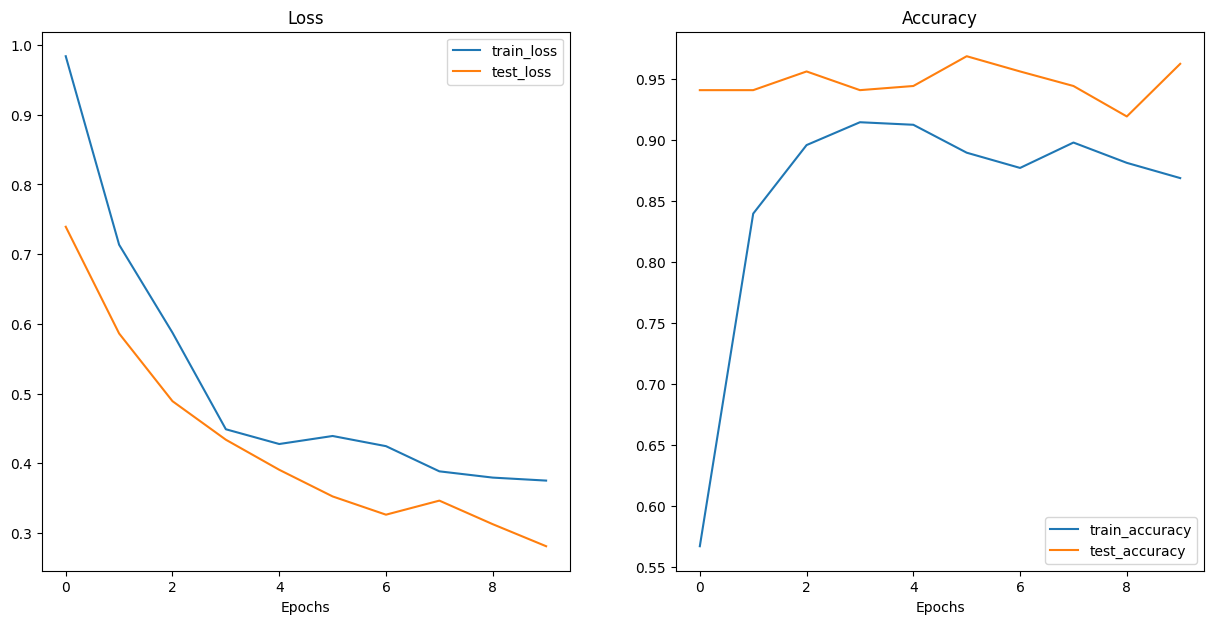

In [13]:
from helper_functions import plot_loss_curves

plot_loss_curves(effnetb2_results)

## 3.5 Save EffnetB2 feature extractor

In [14]:
from going_modular.going_modular import utils

#save the model
utils.save_model(model=effnetb2,
                 target_dir="models",
                 model_name="09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth")

[INFO] Saving model to: models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth


## 3.6 Inspecting the size of our EffnetB2 feature extractor


In [15]:
from pathlib import Path

# get the model size in bytes and convert to megabytes
pretrained_effnetb2_model_size = Path("models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth").stat().st_size /(1024*1024)
print(f"Pretrained effnetb2 feature extractor model size: {round(pretrained_effnetb2_model_size, 2)} MB")

Pretrained effnetb2 feature extractor model size: 29.86 MB


## 3.7 Collecting EffnetB2 feature extractor stats

In [16]:
# count the number of params in EffnetB2
effnetb2_total_params = sum(torch.numel(param) for param in effnetb2.parameters())
effnetb2_total_params

7705221

In [17]:
# create a dict with effnetb2
effnetb2_stats = {"test_loss": effnetb2_results["test_loss"][-1],
                  "test_acc": effnetb2_results["test_acc"][-1],
                  "number_of_parameters": effnetb2_total_params,
                  "model_size (MB)": pretrained_effnetb2_model_size}
effnetb2_stats

{'test_loss': 0.28108686208724976,
 'test_acc': 0.9625,
 'number_of_parameters': 7705221,
 'model_size (MB)': 29.8638858795166}

# 4. Creating an ViT_b_16 feature extractor

In [18]:
# 1. Setup pretrained ViT_b_16 weights
vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT

# 2. Get ViT_b_16 transforms
vit_transforms = vit_weights.transforms()

# 3. Setup pretrained model
vit = torchvision.models.vit_b_16(weights=vit_weights) # could also use weights="DEFAULT"

# 4. Freeze the base layers in the model (this will freeze all layers to begin with)
for param in vit.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:02<00:00, 156MB/s]


In [19]:
from torchinfo import summary

# Print ViT feature extractor model summary (uncomment for full output)
summary(vit,
        input_size=(1, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [1, 3, 224, 224]     [1, 1000]            768                  False
├─Conv2d (conv_proj)                                         [1, 3, 224, 224]     [1, 768, 14, 14]     (590,592)            False
├─Encoder (encoder)                                          [1, 197, 768]        [1, 197, 768]        151,296              False
│    └─Dropout (dropout)                                     [1, 197, 768]        [1, 197, 768]        --                   --
│    └─Sequential (layers)                                   [1, 197, 768]        [1, 197, 768]        --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [1, 197, 768]        [1, 197, 768]        (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [1, 197, 768]        [1, 197

In [20]:
# Check out ViT_b_16 classifier head
vit.heads

Sequential(
  (head): Linear(in_features=768, out_features=1000, bias=True)
)

In [21]:
# 5. Update the classifier head
vit.heads = nn.Sequential(
                        nn.Linear(in_features=768, # keep in_features same
                                out_features=3)) # change out_features to suit our number of classes

## 4.1 Creating a function to make an ViT_b_16 feature extractor#

In [22]:
def create_vit_model(num_classes:int=3,
                     seed:int=42):
    """Creates a ViT-B/16 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of target classes. Defaults to 3.
        seed (int, optional): random seed value for output layer. Defaults to 42.

    Returns:
        model (torch.nn.Module): ViT-B/16 feature extractor model.
        transforms (torchvision.transforms): ViT-B/16 image transforms.
    """
    # Create ViT_B_16 pretrained weights, transforms and model
    weights = torchvision.models.ViT_B_16_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.vit_b_16(weights=weights)

    # Freeze all layers in model
    for param in model.parameters():
        param.requires_grad = False

    # Change classifier head to suit our needs (this will be trainable)
    torch.manual_seed(seed)
    model.heads = nn.Sequential(nn.Linear(in_features=768, # keep this the same as original model
                                          out_features=num_classes)) # update to reflect target number of classes

    return model, transforms

In [23]:
# Create ViT model and transforms
vit, vit_transforms = create_vit_model(num_classes=3,
                                       seed=42)

## 4.2 Creating DataLoaders for ViT_b_16

In [24]:
# Setup DataLoaders
from going_modular.going_modular import data_setup
train_dataloader_vit, test_dataloader_vit, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                 test_dir=test_dir,
                                                                                                 transform=vit_transforms,
                                                                                                 batch_size=32)

## 4.3 Training ViT_b_16 feature extractor

In [25]:
from going_modular.going_modular import engine

# Setup optimizer
optimizer = torch.optim.Adam(params=vit.parameters(),
                             lr=1e-3)
# Setup loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Set seeds for reproducibility and train the model
set_seeds()
vit_results = engine.train(model=vit,
                                train_dataloader=train_dataloader_vit,
                                test_dataloader=test_dataloader_vit,
                                epochs=10,
                                optimizer=optimizer,
                                loss_fn=loss_fn,
                                device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7020 | train_acc: 0.7521 | test_loss: 0.2714 | test_acc: 0.9381
Epoch: 2 | train_loss: 0.2532 | train_acc: 0.9062 | test_loss: 0.1672 | test_acc: 0.9602
Epoch: 3 | train_loss: 0.1764 | train_acc: 0.9542 | test_loss: 0.1273 | test_acc: 0.9693
Epoch: 4 | train_loss: 0.1276 | train_acc: 0.9625 | test_loss: 0.1074 | test_acc: 0.9722
Epoch: 5 | train_loss: 0.1159 | train_acc: 0.9646 | test_loss: 0.0953 | test_acc: 0.9784
Epoch: 6 | train_loss: 0.1274 | train_acc: 0.9375 | test_loss: 0.0832 | test_acc: 0.9722
Epoch: 7 | train_loss: 0.0897 | train_acc: 0.9771 | test_loss: 0.0845 | test_acc: 0.9784
Epoch: 8 | train_loss: 0.0919 | train_acc: 0.9812 | test_loss: 0.0764 | test_acc: 0.9722
Epoch: 9 | train_loss: 0.0922 | train_acc: 0.9792 | test_loss: 0.0734 | test_acc: 0.9784
Epoch: 10 | train_loss: 0.0658 | train_acc: 0.9833 | test_loss: 0.0644 | test_acc: 0.9847


## 4.4 Inspect ViT_b_16 loss curves

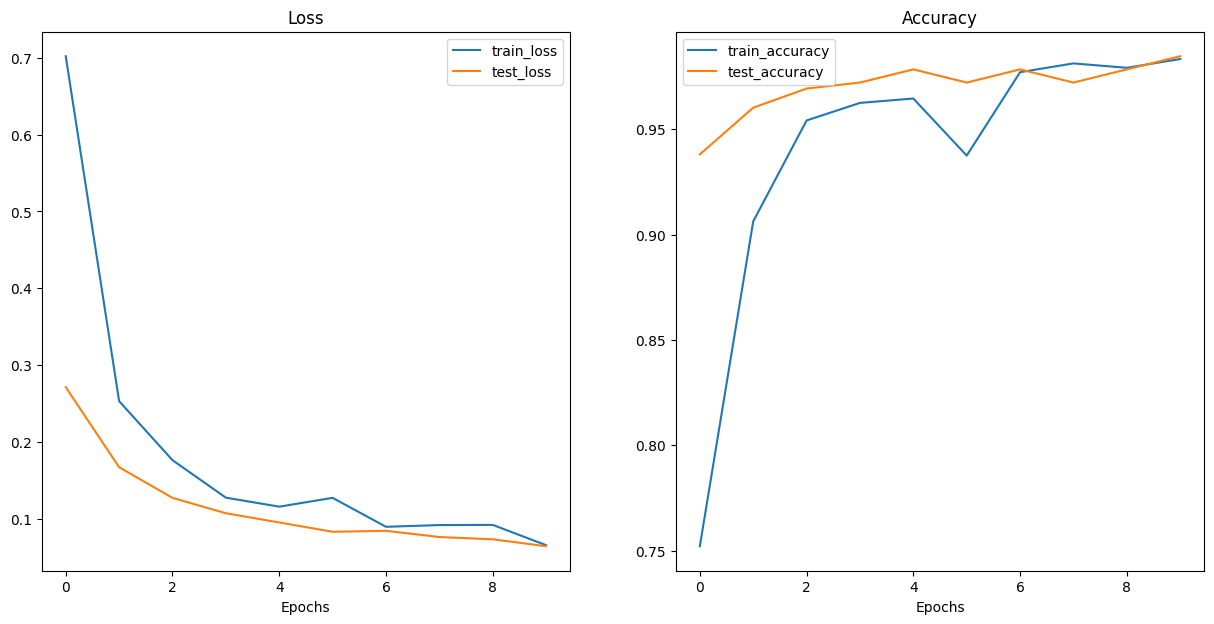

In [26]:
from helper_functions import plot_loss_curves

plot_loss_curves(vit_results)

## 4.5 Saving ViT feature extractor

In [27]:
# Save the model
from going_modular.going_modular import utils

utils.save_model(model=vit,
                 target_dir="models",
                 model_name="09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth")

[INFO] Saving model to: models/09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth


## 4.6 Checking the size of ViT feature extractor


In [28]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_vit_model_size = Path("models/09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth").stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly)
print(f"Pretrained ViT feature extractor model size: {pretrained_vit_model_size} MB")

Pretrained ViT feature extractor model size: 327 MB


## 4.7 Collecting ViT_b_16 feature extractor stats

In [29]:
# Count number of parameters in ViT
vit_total_params = sum(torch.numel(param) for param in vit.parameters())
vit_total_params

85800963

In [30]:
# Create ViT statistics dictionary
vit_stats = {"test_loss": vit_results["test_loss"][-1],
             "test_acc": vit_results["test_acc"][-1],
             "number_of_parameters": vit_total_params,
             "model_size (MB)": pretrained_vit_model_size}

vit_stats

{'test_loss': 0.06443451717495918,
 'test_acc': 0.984659090909091,
 'number_of_parameters': 85800963,
 'model_size (MB)': 327}

# 5. making Predictions with both our models

In [31]:
# list of test image paths
from pathlib import Path

# get all test data paths
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))
test_data_paths[0]

PosixPath('data/pizza_steak_sushi_20_percent/test/pizza/3486640.jpg')

## 5.1 create a functon to make accross the test data set



Now we've got a list of our test image paths, let's get to work on our `pred_and_store()` function:

1. Create a function that takes a list of paths, a trained PyTorch model, a series of transforms (to prepare images), a list of target class names and a target device.
2. Create an empty list to store prediction dictionaries (we want the function to return a list of dictionaries, one for each prediction).
3. Loop through the target input paths (steps 4-14 will happen inside the loop).
4. Create an empty dictionary for each iteration in the loop to store prediction values per sample.
5. Get the sample path and ground truth class name (we can do this by infering the class from the path).
6. Start the prediction timer using Python's [`timeit.default_timer()`](https://docs.python.org/3/library/timeit.html#timeit.default_timer).
7. Open the image using [`PIL.Image.open(path)`](https://pillow.readthedocs.io/en/stable/reference/Image.html#functions).
8. Transform the image so it's capable of being used with the target model as well as add a batch dimension and send the image to the target device.
9. Prepare the model for inference by sending it to the target device and turning on `eval()` mode.
10. Turn on [`torch.inference_mode()`](https://pytorch.org/docs/stable/generated/torch.inference_mode.html) and pass the target transformed image to the model and calculate the prediction probability using `torch.softmax()` and the target label using `torch.argmax()`.
11. Add the prediction probability and prediction class to the prediction dictionary created in step 4. Also make sure the prediction probability is on the CPU so it can be used with non-GPU libraries such as NumPy and pandas for later inspection.
12. End the prediction timer started in step 6 and add the time to the prediction dictionary created in step 4.
13. See if the predicted class matches the ground truth class from step 5 and add the result to the prediction dictionary created in step 4.
14. Append the updated prediction dictionary to the empty list of predictions created in step 2.
15. Return the list of prediction dictionaries.

A bunch of steps, but nothing we can't handle!

Let's do it.

In [32]:
import pathlib
import torch
from PIL import Image
from timeit import default_timer as timer
from tqdm.auto import tqdm
from typing import List, Dict


# Create a function that takes a list of paths, a trained PyTorch model, a series of transforms (to prepare images), a list of target class names and a target device.
def pred_and_store(paths: List[pathlib.Path],
                   model: torch.nn.Module,
                   transform: torchvision.transforms,
                   class_names:List[str],
                   device:str = "cuda" if torch.cuda.is_available() else "cpu")->List:
    # Create an empty list to store prediction dictionaries (we want the function to return a list of dictionaries, one for each prediction).
    pred_list = []
    # Loop through the target input paths (steps 4-14 will happen inside the loop).
    for path in tqdm(paths):
        # Create an empty dictionary for each iteration in the loop to store prediction values per sample.
        pred_dict = {}
        # Get the sample path and ground truth class name (we can do this by infering the class from the path).
        pred_dict["image_path"] = path
        class_name = path.parent.stem
        # Start the prediction timer using Python's timeit.default_timer().
        start_time = timer()
        # Open the image using PIL.Image.open(path).
        img = Image.open(path)
        # Transform the image so it's capable of being used with the target model as well as add a batch dimension and send the image to the target device.
        transformed_image = transform(img).unsqueeze(0).to(device)
        # Prepare the model for inference by sending it to the target device and turning on eval() mode.
        model = model.to(device)
        model.eval()
        # Turn on torch.inference_mode() and pass the target transformed image to the model and calculate the prediction probability using torch.softmax() and the target label using torch.argmax().
        with torch.inference_mode():
            pred_logit = model(transformed_image)
            pred_prob = torch.softmax(pred_logit, dim=1)
            pred_label = torch.argmax(pred_prob, dim=1)
            pred_class = class_names[pred_label.cpu()]
            # Add the prediction probability and prediction class to the prediction dictionary created in step 4. Also make sure the prediction probability is on the CPU so it can be used with non-GPU libraries such as NumPy and pandas for later inspection.
            pred_dict["pred_prob"] = round(pred_prob.unsqueeze(0).max().cpu().item(), 4)
            pred_dict["pred_class"] = pred_class
            # End the prediction timer started in step 6 and add the time to the prediction dictionary created in step 4.
            end_time = timer()
            pred_dict["time_for_pred"] =  round(end_time-start_time, 4)
        # 13. Does the pred match the true label?
        pred_dict["correct"] = class_name == pred_class

        # 14. Add the dictionary to the list of preds
        pred_list.append(pred_dict)

    # 15. Return list of prediction dictionaries
    return pred_list


### 5.2 Making and timing predictions with EffNetB2

Time to test out our `pred_and_store()` function!

Let's start by using it to make predictions across the test dataset with our EffNetB2 model, paying attention to two details:

1. **Device** - We'll hard code the `device` parameter to use `"cpu"` because when we deploy our model, we won't always have access to a `"cuda"` (GPU) device.
    * Making the predictions on CPU will be a good indicator of speed of inference too because generally predictions on CPU devices are slower than GPU devices.
2. **Transforms** - We'll also be sure to set the `transform` parameter to `effnetb2_transforms` to make sure the images are opened and transformed in the same way our `effnetb2` model has been trained on.

In [33]:
# Make predictions across test dataset with EffNetB2
effnetb2_test_pred_dicts = pred_and_store(paths=test_data_paths,
                                          model=effnetb2,
                                          transform=effnetb2_transforms,
                                          class_names=class_names,
                                          device="cpu") # make predictions on CPU

  0%|          | 0/150 [00:00<?, ?it/s]

In [34]:
effnetb2_test_pred_dicts[:2]

[{'image_path': PosixPath('data/pizza_steak_sushi_20_percent/test/pizza/3486640.jpg'),
  'pred_prob': 0.974,
  'pred_class': 'pizza',
  'time_for_pred': 0.2859,
  'correct': True},
 {'image_path': PosixPath('data/pizza_steak_sushi_20_percent/test/pizza/2250611.jpg'),
  'pred_prob': 0.8142,
  'pred_class': 'pizza',
  'time_for_pred': 0.1023,
  'correct': True}]

In [35]:
# Turn the test_pred_dicts into a DataFrame
import pandas as pd
effnetb2_test_pred_df = pd.DataFrame(effnetb2_test_pred_dicts)
effnetb2_test_pred_df.head()

,image_path,pred_prob,pred_class,time_for_pred,correct
0,data/pizza_steak_sushi_20_percent/test/pizza/3...,0.9740,pizza,0.2859,True
1,data/pizza_steak_sushi_20_percent/test/pizza/2...,0.8142,pizza,0.1023,True
2,data/pizza_steak_sushi_20_percent/test/pizza/1...,0.5099,sushi,0.1055,False
3,data/pizza_steak_sushi_20_percent/test/pizza/4...,0.7921,pizza,0.0948,True
4,data/pizza_steak_sushi_20_percent/test/pizza/1...,0.9211,pizza,0.1064,True


In [36]:
# Check number of correct predictions
effnetb2_test_pred_df.correct.value_counts()

,count
correct,
True,144
False,6


In [37]:
# Find the average time per prediction
effnetb2_average_time_per_pred = round(effnetb2_test_pred_df.time_for_pred.mean(), 4)
print(f"EffNetB2 average time per prediction: {effnetb2_average_time_per_pred}")

EffNetB2 average time per prediction: 0.1021


> **Note:** Prediction times will vary (much like training times) depending on the hardware you're using... so generally the faster your compute (e.g. CPU or GPU), the faster the predictions will happen.

In [38]:
# Add time per pred to EffNetB2 stats dictionary
effnetb2_stats["time_per_pred_cpu"] = effnetb2_average_time_per_pred
effnetb2_stats

{'test_loss': 0.28108686208724976,
 'test_acc': 0.9625,
 'number_of_parameters': 7705221,
 'model_size (MB)': 29.8638858795166,
 'time_per_pred_cpu': 0.1021}

## 5.3 Making and timing predictions with ViT

In [39]:
# Make list of prediction dictionaries with ViT feature extractor model on test images
vit_test_pred_dicts = pred_and_store(paths=test_data_paths,
                                     model=vit,
                                     transform=vit_transforms,
                                     class_names=class_names,
                                     device="cpu") # hardcode device to CPU because not sure if GPU available when we deploy

  0%|          | 0/150 [00:00<?, ?it/s]

In [40]:
# Check the first couple of ViT predictions
vit_test_pred_dicts[:2]

[{'image_path': PosixPath('data/pizza_steak_sushi_20_percent/test/pizza/3486640.jpg'),
  'pred_prob': 0.9966,
  'pred_class': 'pizza',
  'time_for_pred': 0.5974,
  'correct': True},
 {'image_path': PosixPath('data/pizza_steak_sushi_20_percent/test/pizza/2250611.jpg'),
  'pred_prob': 0.9986,
  'pred_class': 'pizza',
  'time_for_pred': 0.3781,
  'correct': True}]

In [41]:
# Turn vit_test_pred_dicts
import pandas as pd
vit_test_pred_df = pd.DataFrame(vit_test_pred_dicts)
vit_test_pred_df.head()

,image_path,pred_prob,pred_class,time_for_pred,correct
0,data/pizza_steak_sushi_20_percent/test/pizza/3...,0.9966,pizza,0.5974,True
1,data/pizza_steak_sushi_20_percent/test/pizza/2...,0.9986,pizza,0.3781,True
2,data/pizza_steak_sushi_20_percent/test/pizza/1...,0.9963,pizza,0.3630,True
3,data/pizza_steak_sushi_20_percent/test/pizza/4...,0.9917,pizza,0.3582,True
4,data/pizza_steak_sushi_20_percent/test/pizza/1...,0.9987,pizza,0.3588,True


In [42]:
# See how many correct
vit_test_pred_df.correct.value_counts()

,count
correct,
True,148
False,2


In [43]:
# Calculate average time per prediction for ViT model
vit_average_time_per_pred = round(vit_test_pred_df.time_for_pred.mean(), 4)
print(f"ViT average time per prediction: {vit_average_time_per_pred}")

ViT average time per prediction: 0.402


In [44]:
# Add average time per prediction to ViT stats
vit_stats["time_per_pred_cpu"] = vit_average_time_per_pred
vit_stats

{'test_loss': 0.06443451717495918,
 'test_acc': 0.984659090909091,
 'number_of_parameters': 85800963,
 'model_size (MB)': 327,
 'time_per_pred_cpu': 0.402}

# 6. Comparing model results, prediction times and size

In [45]:
# Turn stat dictionaries into DataFrame
df = pd.DataFrame([effnetb2_stats, vit_stats])

# Add column for model names
df["model"] = ["EffNetB2", "ViT"]

# Convert accuracy to percentages
df["test_acc"] = round(df["test_acc"] * 100, 2)

df

,test_loss,test_acc,number_of_parameters,model_size (MB),time_per_pred_cpu,model
0,0.281087,96.25,7705221,29.863886,0.1021,EffNetB2
1,0.064435,98.47,85800963,327.000000,0.4020,ViT


Which model is better?
* `test_loss` (lower is better) - ViT
* `test_acc` (higher is better) - ViT
* `number_of_parameters` (generally lower is better*) - EffNetB2 (if a model has more parameters, it generally takes longer to compute)
  * *sometimes models with higher parameters can still perform fast
* `model_size (MB)` - EffNetB2 (for our use case of deploying to a mobile device, generally lower is better)
* `time_per_pred_cpu` (lower is better, will be highly dependent on the hardware you're running on) - EffNetB2

Both models fail to achieve our goal of 30+FPS... however we could always just try and use EffNetB2 and see how it goes.

In [46]:
# Compare ViT to EffNetB2 across different characteristics
pd.DataFrame(data=(df.set_index("model").loc["ViT"] / df.set_index("model").loc["EffNetB2"]),
             columns=["ViT to EffNetB2 ratios"]).T

,test_loss,test_acc,number_of_parameters,model_size (MB),time_per_pred_cpu
ViT to EffNetB2 ratios,0.229233,1.023065,11.135432,10.94968,3.937316


### 6.1 Visualizing the speed vs. performance tradeoff

So we've compared our EffNetB2 and ViT feature extractor models, now let's visualize the comparison with a speed vs. performance plot.

We can do so with matplotlib:
1. Create a scatter plot from the comparison DataFrame to compare EffNetB2 and ViT across test accuracy and prediction time.
2. Add titles and labels to make our plot look nice.
3. Annotate the samples on the scatter plot so we know what's going on.
4. Create a legend based on the model sizes (`model_size (MB)`).

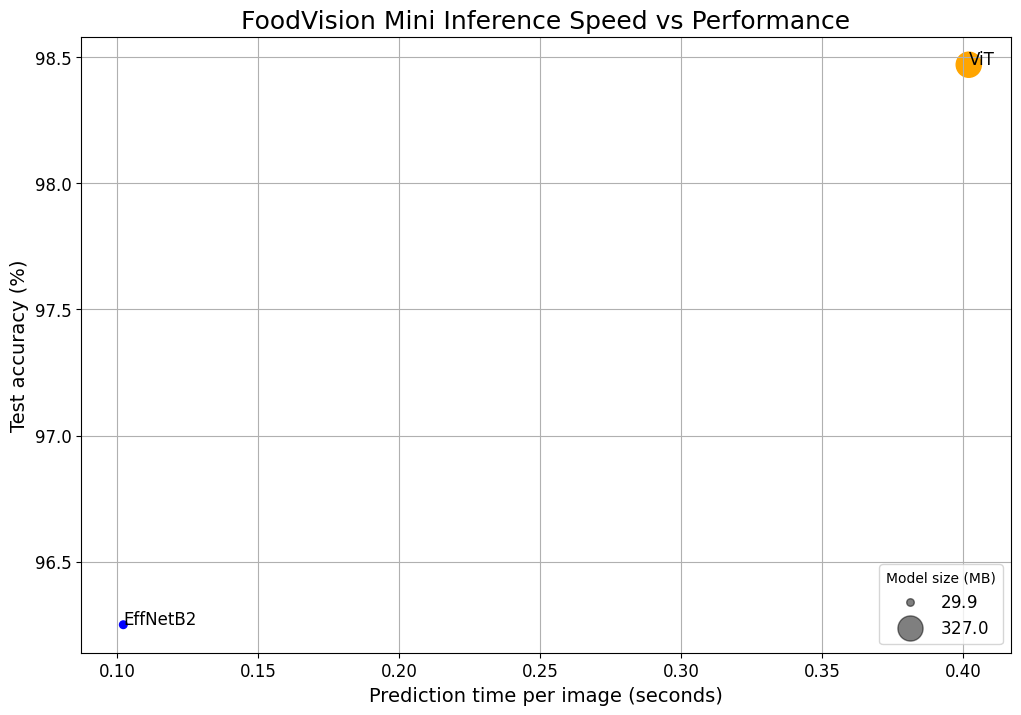

In [47]:
# 1. create a plot from model comparison dataframe
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(data=df,
                     x="time_per_pred_cpu",
                     y="test_acc",
                     c=["blue", "orange"],
                     s="model_size (MB)"
                     )

# 2. Add titles and labels to make our plot look good
ax.set_title("FoodVision Mini Inference Speed vs Performance", fontsize=18)
ax.set_xlabel("Prediction time per image (seconds)", fontsize=14)
ax.set_ylabel("Test accuracy (%)", fontsize=14)
ax.tick_params(axis="both", labelsize=12)
ax.grid(True)

# Annotate the samples on the scatter plot so we know what's going on.
for index, row in df.iterrows():
    ax.annotate(text=row["model"],
                xy=(row["time_per_pred_cpu"],row["test_acc"]),
                size=12)
# Create a legend based on the model sizes (model_size (MB)).
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.5)
model_size_legend = ax.legend(handles,
                              labels,
                              loc="lower right",
                              title="Model size (MB)",
                              fontsize=12)
# Save the figure
plt.savefig("09-foodvision-mini-inference-speed-vs-performance.png")


#7. Turn foodvisionmini into a gradio demo

* Gradio is the fastest way to demo your machine learning model with a friendly web interface so that anyone can use it, anywhere!

In [48]:
# import/install gradio
try:
    import gradio as gr
except:
    !pip -q install gradio
    import gradio as gr

print(f"Gradio version: {gr.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.6 MB/s eta 0:00:00
Gradio version: 4.42.0


<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-gradio-workflow.png" alt="gradio workflow of inputs flowing into some kind of model or function and then producing outputs" width=900/>

##7.2 create a function to map out inputs and outputs


In [49]:
# put our model on the cpu
effnetb2 = effnetb2.to("cpu")

# check the device
next(iter(effnetb2.parameters())).device

device(type='cpu')

Lets create a function called predict to go from
```
images of food ->ML model(effnetb2) -> outputs(food class label)

```

In [50]:
from typing import Tuple, Dict

def predict(img) -> Tuple[Dict, float]:
  # Start a timer
  start_time = timer()

  # Transform the input image for use with EffNetB2
  img = effnetb2_transforms(img).unsqueeze(0) # unsqueeze = add batch dimension on 0th index

  # Put model into eval mode, make prediction
  effnetb2.eval()
  with torch.inference_mode():
    # Pass transformed image through the model and turn the prediction logits into probaiblities
    pred_probs = torch.softmax(effnetb2(img), dim=1)

  # Create a prediction label and prediction probability dictionary
  pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}

  # Calculate pred time
  end_time = timer()
  pred_time = round(end_time - start_time, 4)

  # Return pred dict and pred time
  return pred_labels_and_probs, pred_time

In [51]:
import random
from PIL import Image

# Get a list of all test image filepaths
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))
print(f"Example test data path: {test_data_paths[0]}")

# Randomly select a test image path
random_image_path = random.sample(test_data_paths, k=1)[0]
random_image_path

# Open the target image
image = Image.open(random_image_path)
print(f"[INFO] Predicting on image at path: {random_image_path}\n")

# Predict on the target image and print out the outputs
pred_dict, pred_time = predict(img=image)
print(pred_dict)
print(pred_time)

Example test data path: data/pizza_steak_sushi_20_percent/test/pizza/3486640.jpg
[INFO] Predicting on image at path: data/pizza_steak_sushi_20_percent/test/sushi/167716.jpg

{'pizza': 0.13947926461696625, 'steak': 0.37694504857063293, 'sushi': 0.48357564210891724}
0.091


## 7.3 Creating a list of example images

In [52]:
# create a list of example imnputs to our gradio demo
example_list = [[str(filepath) for filepath in random.sample(test_data_paths, k=3)]]
example_list

[['data/pizza_steak_sushi_20_percent/test/sushi/592799.jpg',
  'data/pizza_steak_sushi_20_percent/test/steak/48208.jpg',
  'data/pizza_steak_sushi_20_percent/test/sushi/1844723.jpg']]

## 7.4 building gradio interface

In [53]:
import gradio as gr

# create title, description, article
title = "FoodVision Mini🍕🥩🍣"
description = "An [EfficientNetB2 feature extractor](https://pytorch.org/vision/stable/models/generated/torchvision.models.efficientnet_b2.html#torchvision.models.efficientnet_b2) computer vision model to classify images as pizza, steak or sushi."
article = "Created at [09. PyTorch Model Deployment](https://www.learnpytorch.io/09_pytorch_model_deployment/#74-building-a-gradio-interface)."


# create gradio demo
demo = gr.Interface(fn=predict,
                    inputs=gr.Image(type="pil"),
                    outputs=[gr.Label(num_top_classes=3, label="Predictions"),
                             gr.Number(label="Prediction_time (s)")],
                    examples=example_list,
                    title=title,
                    description=description,
                    article=article
                    )

# lanch the demo
demo.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d5309ee277f9e947cb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# 8. Turning our foodvidsionmini into a deployable app

## 8.2 Deploy Gradio App structure

Let's start to put all of our app files into a single directory:

```
Colab -> folder with all Gradio files -> upload app files to Hugging Face Spaces -> deploy
```

By the end our file structure will look like this:

```
demos/
└── foodvision_mini/
    ├── 09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth
    ├── app.py
    ├── examples/
    │   ├── example_1.jpg
    │   ├── example_2.jpg
    │   └── example_3.jpg
    ├── model.py
    └── requirements.txt
```

Why use this structure?

Because it's one of the simplest we could start with.

You can see this in action:
* Deployed app - https://huggingface.co/spaces/mrdbourke/foodvision_mini
* See the example file structure - https://huggingface.co/spaces/mrdbourke/foodvision_mini/tree/main